# Opportunity Insights 2023: Unveiling Trends from Archived Data

Data link: https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

File name: FY2023_archived_opportunities.csv

### 1. Analyzing trends over time in the issuance of notices, focusing on variables like department, type, and geographical distribution. 

In [1]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("Opportunity Insights") \
    .getOrCreate()

In [2]:
# Load the dataset
file_path = "FY2023_archived_opportunities.csv"  # Replace with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the dataframe structure
df.printSchema()

root
 |-- NoticeId: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Sol#: string (nullable = true)
 |-- Department/Ind.Agency: string (nullable = true)
 |-- CGAC: string (nullable = true)
 |-- Sub-Tier: string (nullable = true)
 |-- FPDS Code: string (nullable = true)
 |-- Office: string (nullable = true)
 |-- AAC Code: string (nullable = true)
 |-- PostedDate: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- BaseType: string (nullable = true)
 |-- ArchiveType: string (nullable = true)
 |-- ArchiveDate: string (nullable = true)
 |-- SetASideCode: string (nullable = true)
 |-- SetASide: string (nullable = true)
 |-- ResponseDeadLine: string (nullable = true)
 |-- NaicsCode: string (nullable = true)
 |-- ClassificationCode: string (nullable = true)
 |-- PopStreetAddress: string (nullable = true)
 |-- PopCity: string (nullable = true)
 |-- PopState: string (nullable = true)
 |-- PopZip: string (nullable = true)
 |-- PopCountry: string (nullable = true)


In [3]:
# Get the number of rows and columns
num_rows = df.count()
num_columns = len(df.columns)
# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 372151
Number of columns: 47


In [4]:
# Get the column names
column_names = df.columns

# Print the column names in a tabular format
print("Column Names:")
print("+------------------------+")
print("| {:<20} |".format("Column Name"))
print("+------------------------+")
for col_name in column_names:
    print("| {:<20} |".format(col_name))
print("+------------------------+")

Column Names:
+------------------------+
| Column Name          |
+------------------------+
| NoticeId             |
| Title                |
| Sol#                 |
| Department/Ind.Agency |
| CGAC                 |
| Sub-Tier             |
| FPDS Code            |
| Office               |
| AAC Code             |
| PostedDate           |
| Type                 |
| BaseType             |
| ArchiveType          |
| ArchiveDate          |
| SetASideCode         |
| SetASide             |
| ResponseDeadLine     |
| NaicsCode            |
| ClassificationCode   |
| PopStreetAddress     |
| PopCity              |
| PopState             |
| PopZip               |
| PopCountry           |
| Active               |
| AwardNumber          |
| AwardDate            |
| Award$               |
| Awardee              |
| PrimaryContactTitle  |
| PrimaryContactFullname |
| PrimaryContactEmail  |
| PrimaryContactPhone  |
| PrimaryContactFax    |
| SecondaryContactTitle |
| SecondaryContactFullname |

In [5]:
df.select("PostedDate").show(truncate=False)

+--------------------------+
|PostedDate                |
+--------------------------+
|2023-09-30 23:56:44.565-04|
|2023-09-30 23:07:36.23-04 |
|2023-09-30 22:21:30.035-04|
|2023-09-30 21:31:26.359-04|
|2023-09-30 20:38:13.619-04|
|2023-09-30 20:27:28.931-04|
|2023-09-30 20:15:19.313-04|
|2023-09-30 20:09:01.128-04|
|2023-09-30 20:05:00.737-04|
|2023-09-30 19:24:35.752-04|
|2023-09-30 19:20:12.252-04|
|2023-09-30 19:06:01.113-04|
|2023-09-30 18:54:36.272-04|
|2023-09-30 18:53:33.321-04|
|2023-09-30 18:43:31.706-04|
|2023-09-30 18:42:45.957-04|
|2023-09-30 18:33:37.533-04|
|2023-09-30 18:31:02.564-04|
|2023-09-30 18:30:03.176-04|
|2023-09-30 18:27:23.07-04 |
+--------------------------+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import col, to_date, month

# Convert string date to date type
df = df.withColumn("PostedMonth", month("PostedDate"))

df = df.withColumnRenamed("Department/Ind.Agency", "Department_Ind_Agency")

# Select relevant columns
trends_df = df.select(
    col("PostedDate"),
    col("Department_Ind_Agency"),
    col("Type"),
    col("PopState"),
    col("PostedMonth")
)


In [7]:
trends_df.show()

+--------------------+---------------------+--------------------+--------+-----------+
|          PostedDate|Department_Ind_Agency|                Type|PopState|PostedMonth|
+--------------------+---------------------+--------------------+--------+-----------+
|2023-09-30 23:56:...|      DEPT OF DEFENSE|        Award Notice|      MI|          9|
|2023-09-30 23:07:...|      DEPT OF DEFENSE|        Award Notice|    NULL|          9|
|2023-09-30 22:21:...|      DEPT OF DEFENSE|        Award Notice|    NULL|          9|
|2023-09-30 21:31:...|      DEPT OF DEFENSE|Combined Synopsis...|      HI|          9|
|2023-09-30 20:38:...|      DEPT OF DEFENSE|        Award Notice|      CA|          9|
|2023-09-30 20:27:...|      DEPT OF DEFENSE|        Award Notice|      MS|          9|
|2023-09-30 20:15:...|      DEPT OF DEFENSE|        Award Notice|      VA|          9|
|2023-09-30 20:09:...|      DEPT OF DEFENSE|        Solicitation|      CO|          9|
|2023-09-30 20:05:...|      DEPT OF DEFENSE

In [8]:
unique_values = trends_df.select("PostedMonth").distinct()
unique_values.show(truncate=False)

+-----------+
|PostedMonth|
+-----------+
|9          |
|8          |
|1          |
|7          |
|6          |
|5          |
|4          |
|3          |
|2          |
|12         |
|11         |
|10         |
|NULL       |
+-----------+



In [9]:
trends_df=trends_df.na.drop()

In [10]:
unique_values = trends_df.select("PostedMonth").distinct()
unique_values.show(truncate=False)

+-----------+
|PostedMonth|
+-----------+
|9          |
|8          |
|1          |
|7          |
|6          |
|5          |
|4          |
|3          |
|2          |
|12         |
|11         |
|10         |
+-----------+



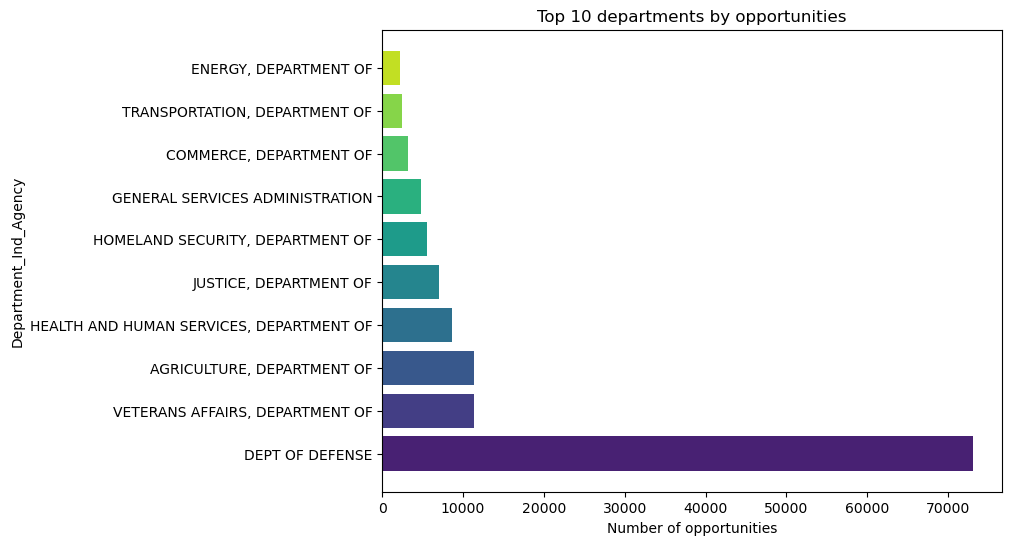

In [11]:
from pyspark.sql.functions import count, desc
import matplotlib.pyplot as plt
import seaborn as sns

# Count notices by department over time
dept_trends = trends_df.groupBy("Department_Ind_Agency").agg(count("*").alias("opportunityCount"))
dept_trends = dept_trends.orderBy(desc("opportunityCount"))

# Show the top 10 records
top_10_dept = dept_trends.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_dept_pd = top_10_dept.toPandas()

colors = sns.color_palette("viridis", len(top_10_dept_pd))


# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_dept_pd['Department_Ind_Agency'], top_10_dept_pd['opportunityCount'], color=colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 departments by opportunities')
plt.xlabel('Number of opportunities')
plt.ylabel('Department_Ind_Agency')

plt.show()

#### Plot representing top 10 departments sorted with respect to opportunities count. It can be seen that Department of Defense has the highest no.of opportunities.

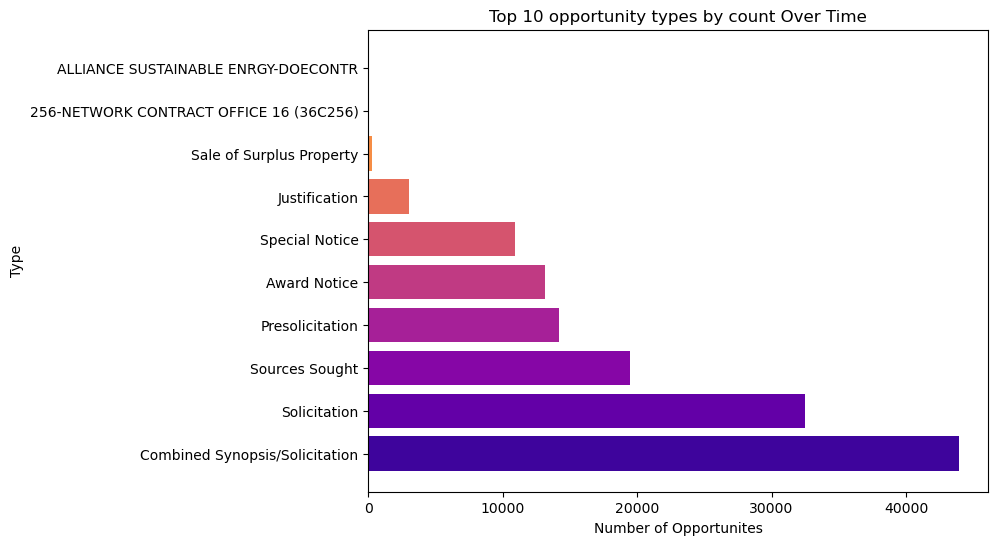

In [12]:
# Count notices by type over time
type_trends = trends_df.groupBy("Type").agg(count("*").alias("OpportunityCount"))
type_trends = type_trends.orderBy(desc("OpportunityCount"))

# Show the top 10 records
top_10_types = type_trends.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_types_pd = top_10_types.toPandas()

colors = sns.color_palette("plasma", len(top_10_dept_pd))

# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_types_pd['Type'], top_10_types_pd['OpportunityCount'], color=colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 opportunity types by count Over Time')
plt.xlabel('Number of Opportunites')
plt.ylabel('Type')

plt.show()


#### Plot representing top 10 Types of opportunities sorted with respect to opportunities count. It can be seen that Combined Synopsis/Solicitation has the highest no.of opportunities.

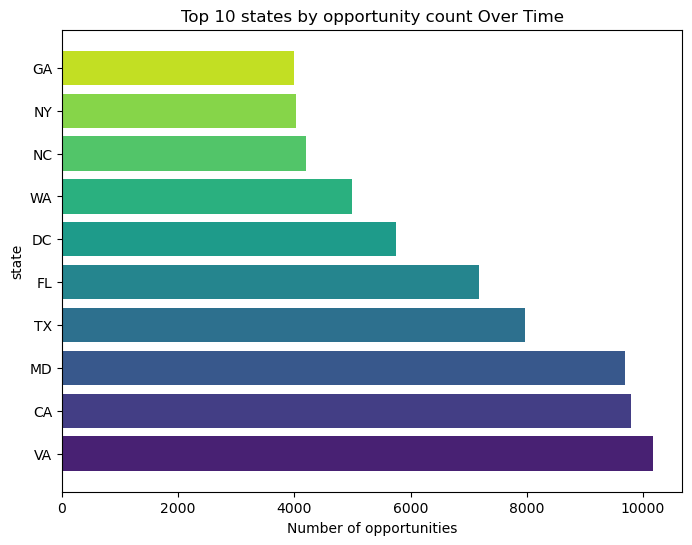

In [13]:
# Count notices by state over time
state_trends = trends_df.groupBy("PopState").agg(count("*").alias("OpportunityCount"))
state_trends = state_trends.orderBy(desc("OpportunityCount"))

# Show the top 10 records
top_10_state = state_trends.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_state_pd = top_10_state.toPandas()

colors = sns.color_palette("viridis", len(top_10_dept_pd))

# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_state_pd['PopState'], top_10_state_pd['OpportunityCount'], color = colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 states by opportunity count Over Time')
plt.xlabel('Number of opportunities')
plt.ylabel('state')

plt.show()

#### Plot representing the count of opportunities by state. It can be seen that Virginia has the highest no.of opportunities.

### 2. Departmental Spending Analysis: Leverage the financial columns (like Award, AwardDate) to analyze award amount patterns across different departments or agencies. 

In [14]:
#Select relevant columns
award_df= df.select(
    col("AwardDate"),
    col("Department_Ind_Agency"),
    col("Award$"),
    col("PostedMonth")
)

In [15]:
# Preprocess the Data
from pyspark.sql.functions import col, to_date

# Convert string date to date type and ensure Award$ is a numeric type
award_df = award_df.withColumn("AwardDate", to_date(col("AwardDate"), "yyyy-MM-dd"))
award_df = award_df.withColumn("Award$", df["Award$"].cast("float"))

# Filtering out rows with null values in critical columns
award_df = award_df.filter(award_df["Award$"].isNotNull() & award_df["AwardDate"].isNotNull() & award_df["Department_Ind_Agency"].isNotNull())


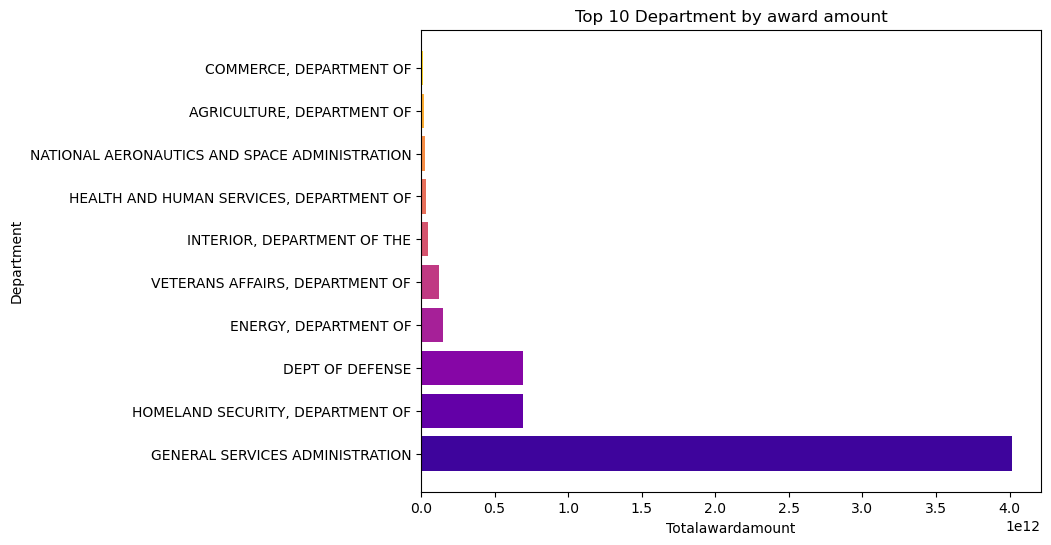

In [16]:
#Aggregate Spending by Department
from pyspark.sql.functions import sum

# Aggregate Total award amount by department
dept_award = award_df.groupBy("Department_Ind_Agency").agg(sum("Award$").alias("Totalawardamount"))

# Order by Total award amount
dept_award = dept_award.orderBy("Totalawardamount", ascending=False)

# Show the top 10 records
top_10_dept_award = dept_award.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_dept_award_pd = top_10_dept_award.toPandas()

colors = sns.color_palette("plasma", len(top_10_dept_pd))

# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_dept_award_pd['Department_Ind_Agency'], top_10_dept_award_pd['Totalawardamount'], color = colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 Department by award amount')
plt.xlabel('Totalawardamount')
plt.ylabel('Department')

plt.show()


#### Plot representing the different departments sorted according to their award amounts. It can be seen that General services Administration has the highest total award amount.

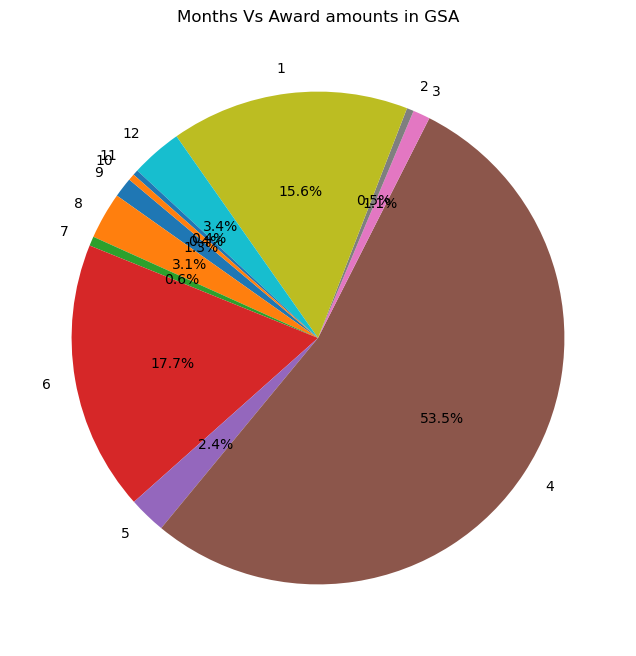

In [17]:
# Filter data for General Services Administration
gsa_award = award_df.filter(col("Department_Ind_Agency") == 'General Services Administration')

# Aggregate total award amount by department
monthly_awardamount = award_df.groupBy("PostedMonth").agg(sum("Award$").alias("Totalawardamount"))


# Convert PySpark DataFrame to Pandas DataFrame for local plotting
monthly_awardamount_pd = monthly_awardamount.toPandas()

# Plotting a pie chart for the top 10 monthly spending
plt.figure(figsize=(8, 8))
plt.pie(monthly_awardamount_pd['Totalawardamount'], labels=monthly_awardamount_pd['PostedMonth'], autopct='%1.1f%%', startangle=140)

# Labeling the plot
plt.title('Months Vs Award amounts in GSA')

plt.show()

#### As observed in the previous plot we can see the general services administration has the highest award amount so we considered the general service administration department and depicted the highest award amount for each month in that particular department. we can see that April has the highest award amount recorded.

### 3. Geographical Analysis of Awards: Use location-based data (PopCity, PopState) to perform a geographical analysis of where awards are being distributed.  

In [18]:
Geographical_df = df.select(
    col("AwardDate"),
    col("Award$"),
    col("PopCity"),
    col("PopState"),
    col("CountryCode")
)

In [19]:
from pyspark.sql.functions import col

# Convert Award$ to a numeric type and ensure location columns are not null
df = df.withColumn("Award$", df["Award$"].cast("float"))
df = df.filter(df["Award$"].isNotNull() & df["PopCity"].isNotNull() & df["PopState"].isNotNull() & df["CountryCode"].isNotNull())


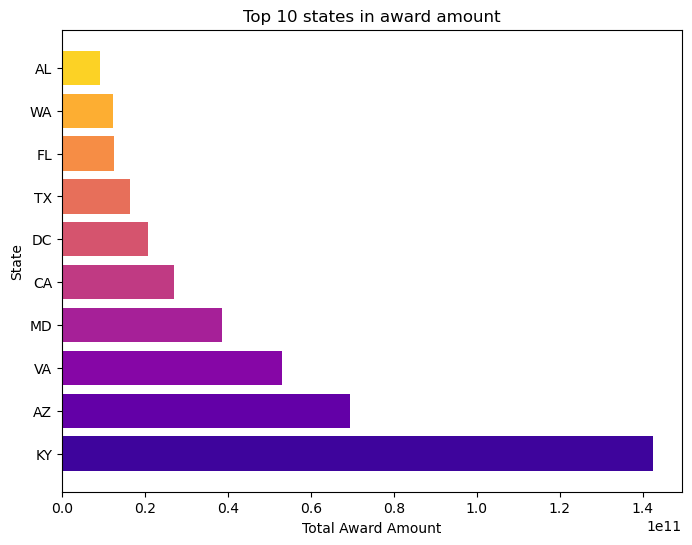

In [20]:
# Aggregate total awards by state
state_awards = df.groupBy("PopState").agg(sum("Award$").alias("TotalAwardAmount"))

# Order by total award amount
state_awards = state_awards.orderBy("TotalAwardAmount", ascending=False)

# Show the top 10 records
top_10_state_awards = state_awards.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_state_awards_pd = top_10_state_awards.toPandas()

colors = sns.color_palette("plasma", len(top_10_dept_pd))

# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_state_awards_pd['PopState'], top_10_state_awards_pd['TotalAwardAmount'], color = colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 states in award amount')
plt.xlabel('Total Award Amount')
plt.ylabel('State')

plt.show()


#### Above plot repesents top 10 states sorted with respect to award amouts and it can be seen that Kentucky has the highest award amount.

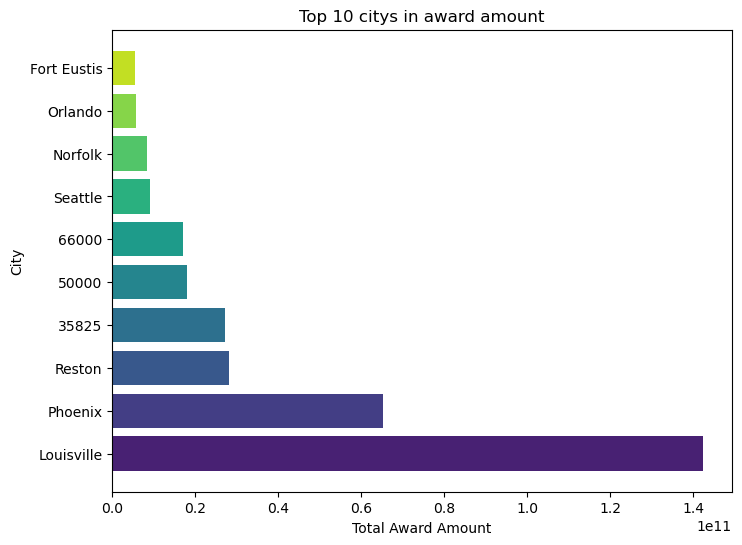

In [21]:
from pyspark.sql.functions import sum

# Aggregate total awards by city
city_awards = df.groupBy("PopCity").agg(sum("Award$").alias("TotalAwardAmount"))

# Order by total award amount
city_awards = city_awards.orderBy("TotalAwardAmount", ascending=False)

# Show the top 10 records
top_10_city_awards = city_awards.limit(10)

# Convert PySpark DataFrame to Pandas DataFrame for local plotting
top_10_city_awards_pd = top_10_city_awards.toPandas()

colors = sns.color_palette("viridis", len(top_10_dept_pd))

# Plotting the horizontal bar Type Vs No. of notices
plt.figure(figsize=(8, 6))
plt.barh(top_10_city_awards_pd['PopCity'], top_10_city_awards_pd['TotalAwardAmount'], color =colors)

# Labeling the plot, x-axis, and y-axis
plt.title('Top 10 citys in award amount')
plt.xlabel('Total Award Amount')
plt.ylabel('City')

plt.show()


#### plot represents different cities sorted in order of total award amount. It can be seen that Louisville has the highest award amount.

### 4. Predictive Modeling for Award Amounts: Use the historical data to build predictive models for future award amounts (Award). 

In [22]:
#Data Preprocessing
from pyspark.sql.functions import col

# Select relevant columns and drop rows with missing values
selected_columns = ["Department_Ind_Agency", "NaicsCode", "PopState", "Award$"]
df = df.select(*selected_columns).na.drop()

In [23]:
#Transform categorical variables into numerical using One-Hot Encoding and assemble all features into a single vector.
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Indexing categorical columns
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) 
    for column in ["Department_Ind_Agency", "NaicsCode", "PopState"]
]

# Encoding indexed columns
encoders = [
    OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+"_enc") 
    for indexer in indexers
]

# Assemble the encoded features
assembler = VectorAssembler(
    inputCols=[encoder.getOutputCol() for encoder in encoders],
    outputCol="features"
)

# Apply transformations
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])
df_transformed = pipeline.fit(df).transform(df)

(train_data, test_data) = df_transformed.randomSplit([0.8, 0.2], seed=1234)


In [24]:
#Model training 
from pyspark.ml.regression import LinearRegression

# Define the model
lr = LinearRegression(featuresCol='features', labelCol='Award$')

# Train the model
lr_model = lr.fit(train_data)


In [25]:
from pyspark.ml.evaluation import RegressionEvaluator

# Predict on train data
train_predictions = lr_model.transform(train_data)

# Predict on test data
test_predictions = lr_model.transform(test_data)

# Evaluate the model using R-squared
evaluator = RegressionEvaluator(labelCol="Award$", predictionCol="prediction", metricName="r2")

test_rmse = evaluator.evaluate(test_predictions)
print(f'Root Mean Squared Error test(RMSE): {test_rmse}')

train_rmse = evaluator.evaluate(train_predictions)
print(f'Root Mean Squared Error train(RMSE): {train_rmse}')

# R-squared on train data
train_r2 = evaluator.evaluate(train_predictions)
print("R-squared on train data =", train_r2)

# R-squared on test data
test_r2 = evaluator.evaluate(test_predictions)
print("R-squared on test data =", test_r2)


Root Mean Squared Error test(RMSE): 0.9724955314548248
Root Mean Squared Error train(RMSE): 0.9643794660399894
R-squared on train data = 0.9643794660399894
R-squared on test data = 0.9724955314548248


In [26]:
from pyspark.ml.regression import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(featuresCol='features', labelCol='Award$')

# Train the model
model = dt_model.fit(train_data)

# Make predictions on the test set
test_predictions = model.transform(test_data)

# Predict on train data
train_predictions = model.transform(train_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='Award$', predictionCol='prediction', metricName='r2')

test_rmse = evaluator.evaluate(test_predictions)
print(f'Root Mean Squared Error test(RMSE): {test_rmse}')

train_rmse = evaluator.evaluate(train_predictions)
print(f'Root Mean Squared Error train(RMSE): {train_rmse}')

# R-squared on train data
train_r2 = evaluator.evaluate(train_predictions)
print("R-squared on train data =", train_r2)

# R-squared on test data
test_r2 = evaluator.evaluate(test_predictions)
print("R-squared on test data =", test_r2)

Root Mean Squared Error test(RMSE): 0.9707581921662933
Root Mean Squared Error train(RMSE): 0.9771638552216855
R-squared on train data = 0.9771638552216855
R-squared on test data = 0.9707581921662933


In [27]:
from pyspark.ml.regression import RandomForestRegressor

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(featuresCol='features', labelCol='Award$', numTrees=100)

# Train the model
model = rf_model.fit(train_data)

# Make predictions on the test set
test_predictions = model.transform(test_data)

# Predict on train data
train_predictions = model.transform(train_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='Award$', predictionCol='prediction', metricName='r2')

test_rmse = evaluator.evaluate(test_predictions)
print(f'Root Mean Squared Error test(RMSE): {test_rmse}')

train_rmse = evaluator.evaluate(train_predictions)
print(f'Root Mean Squared Error train(RMSE): {train_rmse}')

# R-squared on train data
train_r2 = evaluator.evaluate(train_predictions)
print("R-squared on train data =", train_r2)

# R-squared on test data
test_r2 = evaluator.evaluate(test_predictions)
print("R-squared on test data =", test_r2)

Root Mean Squared Error test(RMSE): 0.8645574520148092
Root Mean Squared Error train(RMSE): 0.8610463305541639
R-squared on train data = 0.8610463305541638
R-squared on test data = 0.8645574520148092


In [28]:
spark.stop()